In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from datetime import datetime

In [2]:
df = pd.read_csv('../input/data.csv')

In [3]:
df.shape

(569, 33)

In [4]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


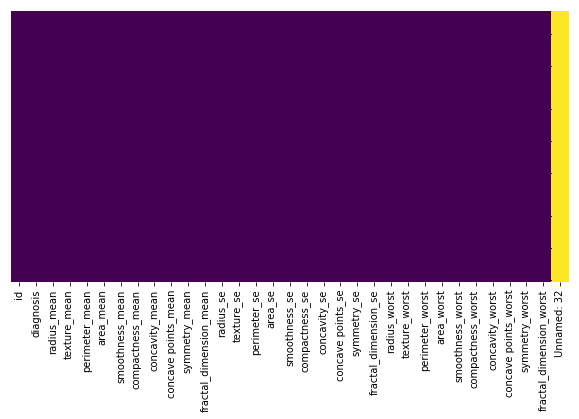

In [5]:
#check missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=False)

In [6]:
#drop columns
df.drop('Unnamed: 32', axis = 1, inplace = True)

In [7]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Text(0.5, 1.0, 'Diagnosis Distribution')

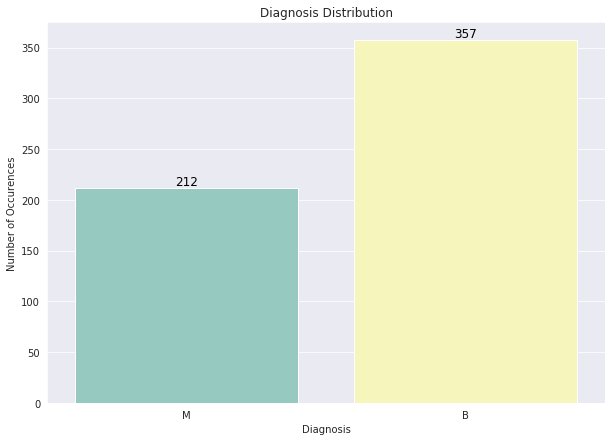

In [8]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
ax = sns.countplot(df['diagnosis'], palette = "Set3")
for p in ax.patches:
     ax.text(p.get_x() + p.get_width()/2., p.get_height(),  '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.ylabel("Number of Occurences")
plt.xlabel("Diagnosis")
plt.title("Diagnosis Distribution")

In [22]:
means = df[['diagnosis', 'radius_mean', 'texture_mean', 'radius_worst', 'texture_worst']]
means2 = df[['diagnosis', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']]
means3 = df[['diagnosis', 'concave points_mean', 'fractal_dimension_mean']]
melt_means = pd.melt(means, id_vars = 'diagnosis', var_name = "Variables", value_name = "Value")
melt_means2 = pd.melt(means2, id_vars = 'diagnosis', var_name = "Variables", value_name = "Value")
melt_means3 = pd.melt(means3, id_vars = 'diagnosis', var_name = "Variables", value_name = "Value")

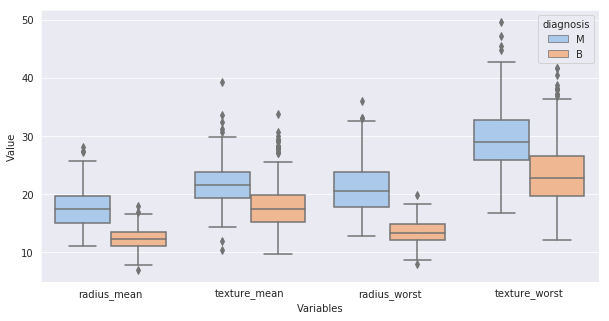

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "Variables", y = "Value", data = melt_means, hue = 'diagnosis', palette = 'pastel')

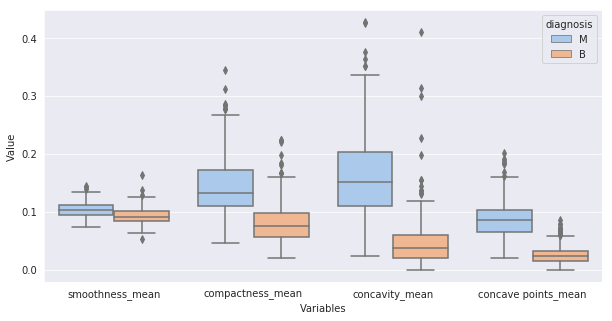

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "Variables", y = "Value", data = melt_means2, hue = 'diagnosis',  palette = 'pastel')

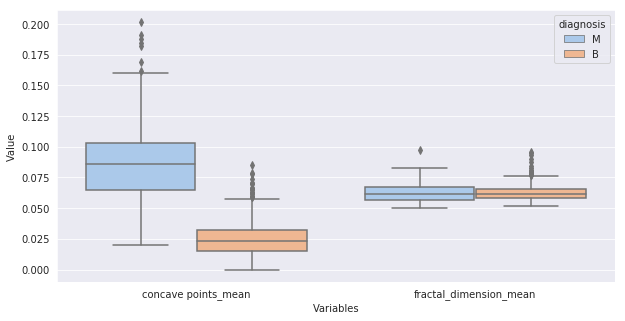

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "Variables", y = "Value", data = melt_means3, hue = 'diagnosis', palette = 'pastel')

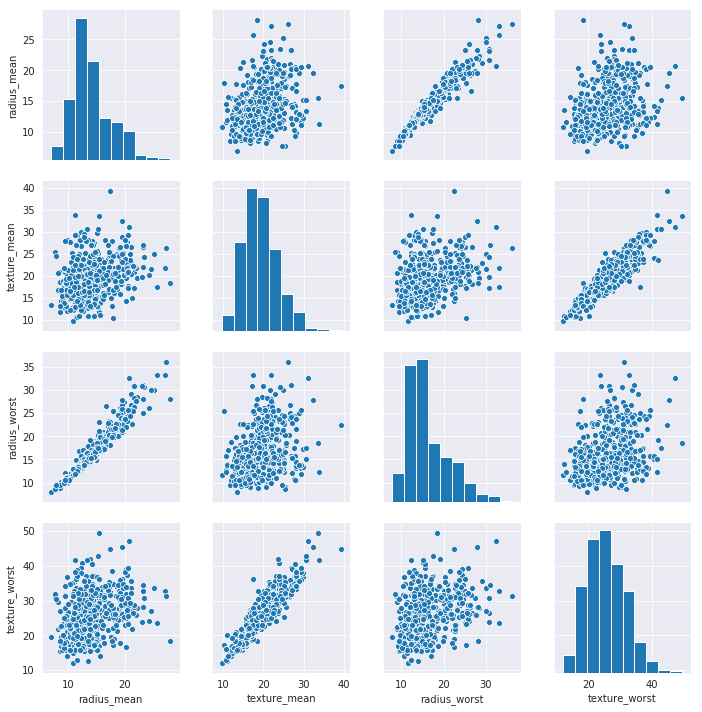

In [30]:
sns.pairplot(means)

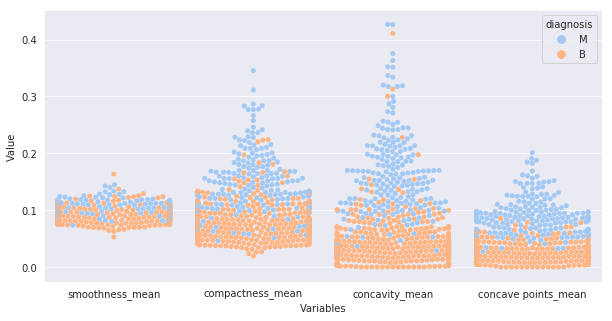

In [33]:
plt.figure(figsize=(10,5))
sns.swarmplot(x = "Variables", y = "Value", data = melt_means2, hue = 'diagnosis', palette = 'pastel')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


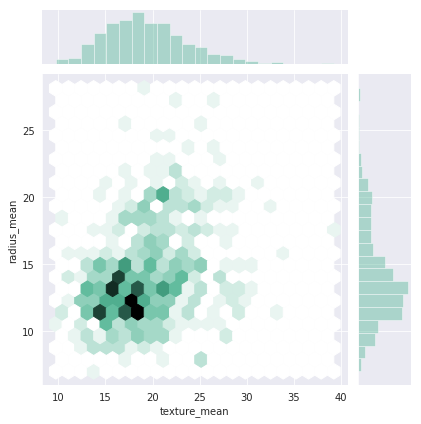

In [40]:
#for any specific relationships
sns.jointplot(x = 'texture_mean', y = 'radius_mean', data = means, kind = 'hex', color = "#4CB391")

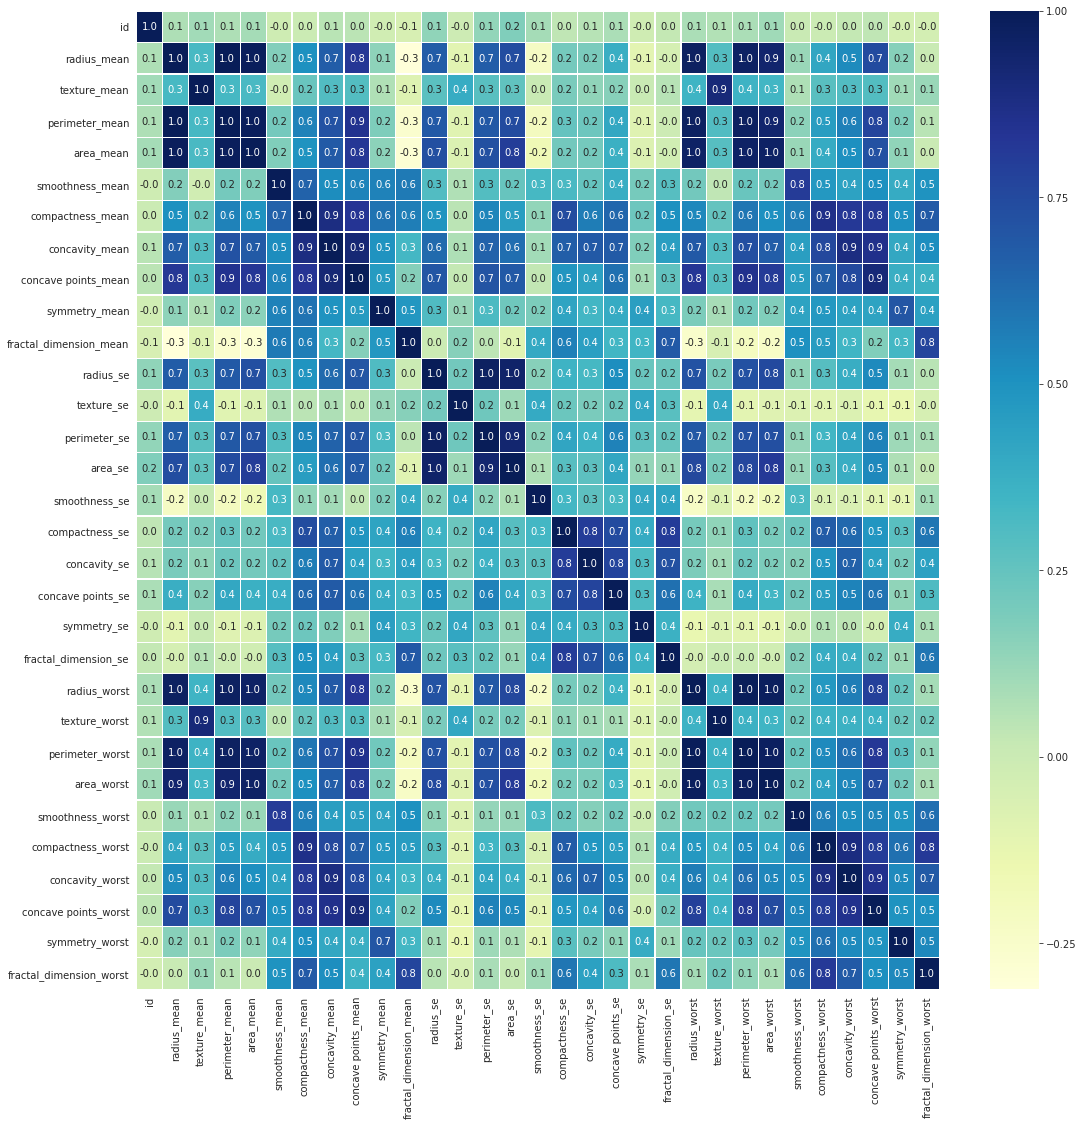

In [48]:
dfcor = df.corr()
fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(dfcor, cmap = "YlGnBu", annot = True,  fmt = '.1f',lw = .25)

Model

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error

In [51]:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [63]:
sf = SelectFromModel(RandomForestClassifier(n_estimators=100))
sf.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [64]:
sf.get_support()

array([False, False, False,  True,  True, False, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
        True,  True, False, False])

In [70]:
print(X_train.columns[sf.get_support()])

Index(['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


Re-fit the model

In [75]:
X = df[['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst']]

y = df['diagnosis']

In [ ]:
Applying DecisionTree

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)
def get_confusionmaxtric(max_leaf_nodes, X_train, X_test, y_train, y_test):
    mo = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=1)
    mo.fit(X_train, y_train)
    preds = mo.predict(X_test)
    confusionmaxtric = confusion_matrix(y_test, preds)
    return(confusionmaxtric)

In [102]:
for max_leaf_nodes in [5, 50, 100, 500, 1000]:
    my_cm = get_confusionmaxtric(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes:{} \n Confusion Matrics: \n{}".format(max_leaf_nodes, my_cm))

Max leaf nodes:5 
 Confusion Matrics: 
[[103   5]
 [ 12  51]]
Max leaf nodes:50 
 Confusion Matrics: 
[[103   5]
 [  7  56]]
Max leaf nodes:100 
 Confusion Matrics: 
[[103   5]
 [  7  56]]
Max leaf nodes:500 
 Confusion Matrics: 
[[103   5]
 [  7  56]]
Max leaf nodes:1000 
 Confusion Matrics: 
[[103   5]
 [  7  56]]


In [83]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           B       0.94      0.94      0.94       108
           M       0.90      0.90      0.90        63

   micro avg       0.93      0.93      0.93       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171

[[102   6]
 [  6  57]]


Applying RandomForest

In [76]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
pre = model.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [81]:
print(classification_report(y_test, pre))
print(confusion_matrix(y_test, pre))

              precision    recall  f1-score   support

           B       0.95      0.97      0.96       108
           M       0.95      0.92      0.94        63

   micro avg       0.95      0.95      0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

[[105   3]
 [  5  58]]


Conclusion: RandomForest performed better than DecisionTree